In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
%matplotlib inline

/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#1.a
comm_df = pd.read_csv("/Users/Yiyang/Documents/CSC 478/communities.csv", na_values = ['?'])
comm_df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
pd.set_option("display.max_rows", 1000)

In [4]:
na = pd.DataFrame(comm_df.isnull().sum(0))
na

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


In [5]:
#Since there is a NA value in OtherPerCap, so replace it with mean value
OPC_mean = comm_df.OtherPerCap.mean()
comm_df.OtherPerCap.fillna(OPC_mean, axis = 0, inplace = True)

In [6]:
comm_df.describe(include = "all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [7]:
#Seperate attributes
comm_df_x = comm_df.drop(['state', 'communityname', 'ViolentCrimesPerPop'], axis = 1, inplace = False)
comm_df_y = comm_df['ViolentCrimesPerPop']

In [8]:
comm_df_x.shape

(1994, 97)

In [9]:
comm_df_y.shape

(1994,)

In [10]:
comm_df_x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [11]:
comm_df_y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [12]:
#1.b
x = np.array(comm_df_x)
x = np.array([np.concatenate((v, [1])) for v in x])
x

array([[ 0.19,  0.33,  0.02, ...,  0.26,  0.2 ,  1.  ],
       [ 0.  ,  0.16,  0.12, ...,  0.12,  0.45,  1.  ],
       [ 0.  ,  0.42,  0.49, ...,  0.21,  0.02,  1.  ],
       ..., 
       [ 0.16,  0.37,  0.25, ...,  0.32,  0.18,  1.  ],
       [ 0.08,  0.51,  0.06, ...,  0.38,  0.33,  1.  ],
       [ 0.2 ,  0.78,  0.14, ...,  0.3 ,  0.05,  1.  ]])

In [13]:
y = np.array(comm_df_y)
y

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [14]:
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
p = linreg.predict(x)
err = abs(p - y)
print(err[:10])

[ 0.03448162  0.37937027  0.04632201  0.20270857  0.05129155  0.09017938
  0.05800201  0.1076608   0.29252029  0.14473903]


In [16]:
#Compute RMSE Train
total_error = np.dot(err, err)
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

0.128889607798


In [17]:
#Coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [  1.31108068e-01  -3.14114977e-02   2.09909670e-01  -4.05351612e-02
  -1.38892919e-02   5.89726825e-02   1.23399025e-01  -2.22621600e-01
  -1.47500199e-01   5.01635477e-02  -2.42413829e-01   4.64024392e-02
  -1.96945615e-01  -2.06117500e-01   4.65935490e-02  -1.77212915e-01
   6.30148504e-02   1.14942190e-02  -9.08951848e-02   2.74640044e-01
   1.01752476e-01  -3.31517562e-01  -2.91799268e-02  -3.54483393e-02
   2.26173855e-02   4.30950137e-02   3.44408548e-02   1.28412458e-01
  -1.91293360e-01  -1.00769002e-01   6.46856092e-02   1.06062117e-01
   2.44125996e-06   2.34984611e-01  -3.75705330e-02  -7.74957660e-03
   4.66779619e-01   2.26295907e-01   1.74621953e-01  -5.75206227e-01
  -1.41954207e-01   5.68782538e-02  -3.51066745e-01  -3.49493414e-02
   4.63705978e-04   5.57016681e-02  -1.82238360e-01  -1.54646442e-01
   1.26172899e-01  -1.44320569e-01   2.39071713e-02   3.33390229e-02
  -7.42297409e-02   3.59876412e-02  -3.31691535e-02  -2.18174916e-01
   4.45

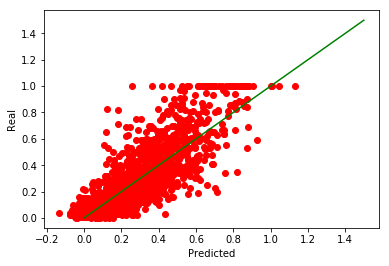

In [18]:
#Plot output
plt.plot(p, y, 'ro')
plt.plot([0, 1.5], [0, 1.5], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [19]:
#RMSE using 10-fold validation
kf = KFold(len(x), n_folds = 10)
xval_err = 0
for train, test in kf:
    linreg.fit(x[train], y[train])
    p = linreg.predict(x[test])
    e = p - y[test]
    xval_err += np.dot(e, e)

rmse_10cv = np.sqrt(xval_err/len(x))

print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


In [23]:
#1.c
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


/Users/Yiyang/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
x = np.array(comm_df_x)
x = np.array([np.concatenate((v, [1])) for v in x])
y = np.array(comm_df_y)

/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastru

1 0.549746215401
6 0.609462417807
11 0.618859170144
16 0.623421931496
21 0.634126820208
26 0.649111577571
31 0.651829991248
36 0.652549962638
41 0.653282691676
46 0.651789864436
51 0.650180868862
56 0.652239004868
61 0.653257958755
66 0.654000866874


/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastru

71 0.652920720119
76 0.657878705313
81 0.65732105804
86 0.657800840578
91 0.65745285071
96 0.658099990686
Optimal percentile of features:96 

Optimal number of features:93 



/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/Yiyang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: Vi

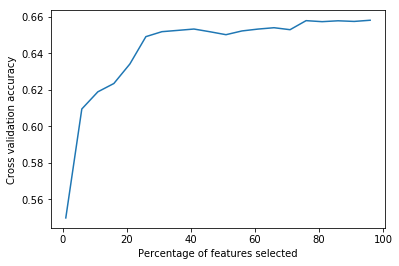

In [34]:
x = np.array(comm_df_x)
x = np.array([np.concatenate((v, [1])) for v in x])
y = np.array(comm_df_y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, x_train_fs, y_train, cv=5))
    print(i, scores.mean())
    results = np.append(results, scores.mean())
    
optimal_percentil = np.where(results == results.max())[0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
optimal_num_features = int(floor(percentiles[optimal_percentil] * len(comm_df_x.columns) / 100))
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles, results)

In [35]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 96)
x_train_fs = fs.fit_transform(x_train, y_train)

for i in range(len(comm_df_x.columns.values)):
    if fs.get_support()[i]:
        print(comm_df_x.columns.values[i],'\t\t', fs.scores_[i])

population 		 256.032354737
householdsize 		 3.4925194162
racepctblack 		 1074.88950927
racePctWhite 		 1412.50781239
racePctAsian 		 1.9595906311
racePctHisp 		 137.540432157
agePct12t21 		 4.8948035328
agePct12t29 		 37.3340149651
agePct16t24 		 15.8750556439
agePct65up 		 8.24793840555
numbUrban 		 247.776138548
pctUrban 		 11.0608958477
medIncome 		 341.632537523
pctWWage 		 161.570750942
pctWFarmSelf 		 40.3442202988
pctWInvInc 		 756.014972331
pctWSocSec 		 22.4863790682
pctWPubAsst 		 784.570640809
pctWRetire 		 13.97562375
medFamInc 		 366.900421844
perCapInc 		 214.993157991
whitePerCap 		 65.4462345492
blackPerCap 		 126.577098619
indianPerCap 		 12.3170954446
AsianPerCap 		 29.0692270689
OtherPerCap 		 33.369302594
HispPerCap 		 92.3657068307
NumUnderPov 		 400.307856891
PctPopUnderPov 		 578.817365214
PctLess9thGrade 		 319.218108102
PctNotHSGrad 		 472.196207869
PctBSorMore 		 173.366843184
PctUnemployed 		 533.913152199
PctEmploy 		 190.465262464
PctEmplManu 		 2.60580581

/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [36]:
from sklearn.metrics import mean_squared_error

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 96)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
linreg_pred = linreg.predict(x_test_fs)
linreg_meanerr = mean_squared_error(y_test, linreg_pred)
print("Mean Sqaured error is %0.4f", linreg_meanerr)

Mean Sqaured error is %0.4f 0.0206921171233


/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Yiyang/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [37]:
#1.d
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [44]:
def calc_params(X, Y, param_values, param_name, K, model, model_name):
    X = np.array(X)
    Y = np.array(Y)
    
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    for i, param_value in enumerate(param_values):
        
        model.set_params(**{param_name:param_value})
        
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
    
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    plt.plot(param_values, train_scores, label = 'Train', alpha = 0.4, lw = 2, c = 'b')
    plt.plot(param_values, test_scores, label = 'X-Val', alpha = 0.4, lw = 2, c = 'r')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation error")
    
    min_err = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err]
    print('The minimum Mean absolute error is:', test_scores[min_err][0],'alpha is', min_err_alpha[0])

In [46]:
alpha = np.linspace(0.01, 200, 200)
alpha = np.array([float(e) for e in alpha])
ridge = Ridge()
lasso = Lasso()

The minimum Mean absolute error is: 0.176099038272 alpha is 96.4875879397


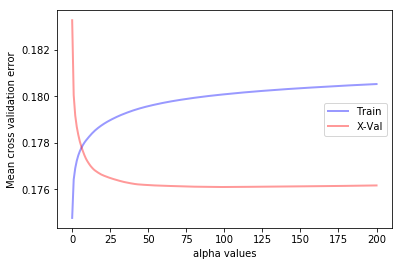

In [47]:
#Ridge Regression
calc_params(x_train, y_train, alpha, "alpha", 5, ridge, "Ridge Regression")

In [49]:
ridge = Ridge(fit_intercept = True, alpha = 96.4875879397)
ridge.fit(x_train, y_train)    
pred = ridge.predict(x_test)
mae = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % mae)

Mean absolute error on test data: 0.02221144


The minimum Mean absolute error is: 0.176658272816 alpha is 0.01


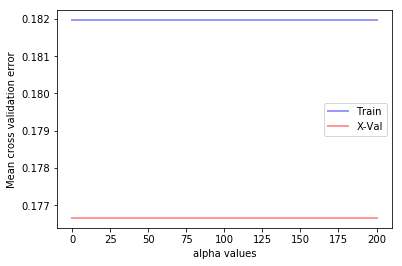

In [50]:
#Lasso Regression
calc_params(x_train, y_train, alpha, "alpha", 5, lasso, "Lasso Regression")

In [51]:
lasso = Lasso(fit_intercept = True, alpha = 0.01)
lasso.fit(x_train, y_train)    
pred = lasso.predict(x_test)
mae = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % mae)

Mean absolute error on test data: 0.02698041


In [55]:
#1.e
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
ss = StandardScaler()
ss.fit(x)
x_std = ss.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=33)

/Users/Yiyang/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
sgdr = SGDRegressor()
para = {'penalty': ['l2', 'l1'], 'alpha': np.linspace(0.0001, 200, 400)}

gs = GridSearchCV(sgdr, para, verbose = 1, cv = 5)

In [57]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
CPU times: user 48.5 s, sys: 594 ms, total: 49.1 s
Wall time: 25.3 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   25.3s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6522843734111241)

In [58]:
for (i, j) in gs.best_params_.items():
    sgdr.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j, "\n")

The optimum value of alpha is estimated as 0.0001 

The optimum value of penalty is estimated as l1 



In [60]:
sgdr = SGDRegressor(penalty = 'l1', alpha = 0.0001)
sgdr.fit(x_train, y_train)
pred = sgdr.predict(x_test)
mae = mean_squared_error(y_test, pred)

print ('Mean Absolute error of set-aside test data set: %0.8f' % mae)

Mean Absolute error of set-aside test data set: 0.02148400


In [63]:
ratio_range = np.linspace(0.0001, 0.9999, 100)

sgdr = SGDRegressor(penalty = 'elasticnet')
calc_params(x_train, y_train, ratio_range, "ratio", 5, sgdr, "SGDRegressor")

ValueError: Penalty 11 is not supported. 

In [64]:
#2.a
def cosineSim(x, d):
    norm_x = np.linalg.norm(x)
    norm_d = np.linalg.norm(d)
    sim = np.dot(d, x)/(norm_d * norm_x)
    dist = 1 - sim
    return dist

In [72]:
#2.b
matrix = pd.DataFrame(np.genfromtxt("/Users/Yiyang/Documents/CSC 478/newsgroups5/matrix.txt", delimiter=',', dtype=int).T)
classes = pd.DataFrame(np.genfromtxt("/Users/Yiyang/Documents/CSC 478/newsgroups5/classes.txt", delimiter=' ', dtype=int, skip_header=1))
terms = np.array(pd.DataFrame(np.genfromtxt("/Users/Yiyang/Documents/CSC 478/newsgroups5/terms.txt", delimiter='\t', dtype=str)))

In [74]:
matrix.shape

(2500, 9328)

In [75]:
terms.shape

(9328, 1)

In [76]:
classes = classes.drop(classes.columns[0], axis=1)
classes.head()

,0,1
0,0,0
1,1,1
2,2,1
3,3,1
4,4,2


In [77]:
classes.shape

(2500, 2)

In [78]:
matrix_train, matrix_test, classes_train, classes_test = train_test_split(matrix, classes, test_size=0.2, random_state=33)

In [79]:
matrix_train.shape

(2000, 9328)

In [80]:
matrix_test.shape

(500, 9328)

In [81]:
#2.c
dt = matrix_train
td = matrix_train.T

dt_test = matrix_test
td_test = matrix_test.T

df = np.array([(td!=0).sum(1)]).T

matrix_doc_number = dt.shape[0]
matrix_term_number = dt.shape[1]
term_freq = matrix_train.sum(axis = 1)

newMatrix = np.ones(np.shape(td), dtype = float) * matrix_doc_number

idf = np.log2(np.divide(newMatrix, df))

td_tfidf_train = np.array(td * idf)
td_tfidf_test = np.array(td_test * idf[:, :500])
dt_tfidf_train = td_tfidf_train.T
dt_tfidf_test = td_tfidf_test.T

dt_tfidf_train[np.isnan(dt_tfidf_train)] = 0
dt_tfidf_test[np.isnan(dt_tfidf_test)] = 0
dt_tfidf_train[dt_tfidf_train == inf] = 0
dt_tfidf_train[dt_tfidf_train == -inf] = 0
dt_tfidf_test[dt_tfidf_test == inf] = 0
dt_tfidf_test[dt_tfidf_test == -inf] = 0

/Users/Yiyang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide


In [84]:
#2.d
from numpy import *

def distEuc(va, vb):
    return sqrt(sum(power(va - vb, 2)))

def randomCent(ds, k):
    n = shape(ds)[1]
    cent = zeros((k,n), dtype = float)
    for j in range(n):
        j_min = min(ds[:, j])
        j_range = float(max(ds[:, j]) - j_min)
        cent[:, j] = j_min + j_range * random.rand(k)    
    return cent

def kMeans(ds, k, distMeas = cosineSim, createCent = randomCent):
    m = shape(ds)[0]
    cent = createCent(ds, k)
    c_assment = zeros((m, 2))
    c_changed = True
    while c_changed:
        c_changed = False
        for i in range(m):
            min_dist = inf 
            min_index = -1
            for j in range(k):
                ji_dist = distMeas(cent[j, :],ds[i, :])
                if ji_dist < min_dist:
                    min_dist = ji_dist 
                    min_index = j
            if c_assment[i,0] != min_index: 
                c_changed = True
            c_assment[i, :] = min_index, min_dist ** 2
        for c in range(k):
            pts = ds[nonzero(c_assment[:, 0] == c)[0]]
            if(len(pts)!=0):
                cent[c,:] = mean(pts, axis=0)
    return cent, c_assment



In [94]:
def top_terms(data, K, numterms):
    cent, c_assment = kMeans(mat(data), K, distMeas = cosineSim)
    for i in range(K):
        print('Cluster', i+1, ': ')
        c_matrix = data[c_assment[:, 0] == i]
        print('Number of items in Cluster ',i+1 ,': ', c_matrix.shape[0])
        c_freq = np.array([(c_matrix.T != 0).sum(1)]).T
        
        mc = c_freq / float(c_matrix.shape[0])
        mc = map(list, mc)
        mc = [m[0] for m in mc]
        c_freq = [m[0] for m in c_freq]
        n = sorted(zip(terms, c_freq, mc),key = lambda x:x[2], reverse = True)
        for m in n[:numterms]:
            print('Term: ',m[0])
            print('Frequency: ',m[1])
            print('Percent of docs contain term ', m[0], ': ', m[2] * 100,'\n')
        print('\n')
    return cent, c_assment

cent, c_assment = top_terms(dt_tfidf_train, 5, 10)

Cluster 1 : 
Number of items in Cluster  1 :  780
Term:  ['write']
Frequency:  464
Percent of docs contain term  ['write'] :  59.4871794872 

Term:  ['on']
Frequency:  373
Percent of docs contain term  ['on'] :  47.8205128205 

Term:  ['articl']
Frequency:  359
Percent of docs contain term  ['articl'] :  46.0256410256 

Term:  ['think']
Frequency:  295
Percent of docs contain term  ['think'] :  37.8205128205 

Term:  ['go']
Frequency:  279
Percent of docs contain term  ['go'] :  35.7692307692 

Term:  ['know']
Frequency:  273
Percent of docs contain term  ['know'] :  35.0 

Term:  ['just']
Frequency:  262
Percent of docs contain term  ['just'] :  33.5897435897 

Term:  ['time']
Frequency:  258
Percent of docs contain term  ['time'] :  33.0769230769 

Term:  ['see']
Frequency:  255
Percent of docs contain term  ['see'] :  32.6923076923 

Term:  ['get']
Frequency:  247
Percent of docs contain term  ['get'] :  31.6666666667 



Cluster 2 : 
Number of items in Cluster  2 :  27
Term:  ['chi

In [87]:
#2.e
from sklearn.metrics import completeness_score, homogeneity_score

cs = completeness_score(np.array(classes_train.T)[0],c_assment[:,0])
hs = homogeneity_score(np.array(classes_train.T)[0],c_assment[:,0])

print('Completeness score: %0.8f' % cs)
print('Homogeneity of Clusters: %0.8f' % hs)

Completeness score: 1.00000000
Homogeneity of Clusters: 0.13421192


In [96]:
#2.f
results = []
for d in dt_tfidf_test:  
    dic = {}
    sim = []
    c = 0
    for centroid in cent:
        c += 1
        cmatrix_sim = 1 - cosineSim(d, centroid)
        sim.append(cmatrix_sim) 
        dic['Cosine Similarity' + str(c)] = cmatrix_sim
    dic['Predicted Cluster'] = sim.index(max(sim)) + 1
    results.append(dic)
test_cluster = pd.DataFrame(results)

In [97]:
test_cluster.head(5)

,Cosine Similarity1,Cosine Similarity2,Cosine Similarity3,Cosine Similarity4,Cosine Similarity5,Predicted Cluster
0,0.086472,0.009545,0.034639,0.038758,0.000003,1
1,0.117915,0.021987,0.072296,0.110554,0.000008,1
2,0.023135,0.006605,0.041702,0.015304,0.000014,3
3,0.096889,0.026882,0.221768,0.098485,0.000008,3
4,0.063087,0.021316,0.098232,0.027268,0.000030,3


In [98]:
test_cluster.to_csv("/Users/Yiyang/Documents/CSC 478/newsgroups5/homework32f.csv")

In [99]:
t_list = list(terms.T[0])

c1 = pd.DataFrame(dt_tfidf_train[c_assment[:,0] == 0])
c1.columns = terms.T[0]
c1_freq = list(np.array((c1.T != 0).sum(1).T))
c1_words = ""
f = 0
for i in c1_freq:
    for j in range(i):
        c1_words += t_list[f] + " "
    f += 1

c2 = pd.DataFrame(dt_tfidf_train[c_assment[:,0] == 1])
c2.columns = terms.T[0]
c2_freq = list(np.array((c2.T != 0).sum(1).T))
c2_words = ""
f = 0
for i in c2_freq:
    for j in range(i):
        c2_words += t_list[f] + " "
    f += 1

c3 = pd.DataFrame(dt_tfidf_train[c_assment[:,0] == 2])
c3.columns = terms.T[0]
c3_freq = list(np.array((c3.T != 0).sum(1).T))
c3_words = ""
f = 0
for i in c3_freq:
    for j in range(i):
        c3_words += t_list[f] + " "
    f += 1

c4 = pd.DataFrame(dt_tfidf_train[c_assment[:,0] == 3])
c4.columns = terms.T[0]
c4_freq = list(np.array((c4.T != 0).sum(1).T))
c4_words = ""
f = 0
for i in c4_freq:
    for j in range(i):
        c4_words += t_list[f] + " "
    f += 1

c5 = pd.DataFrame(dt_tfidf_train[c_assment[:,0] == 4])
c5.columns = terms.T[0]
c5_freq = list(np.array((c5.T != 0).sum(1).T))
c5_words = ""
f = 0
for i in c5_freq:
    for j in range(i):
        c5_words += t_list[f] + " "
    f += 1

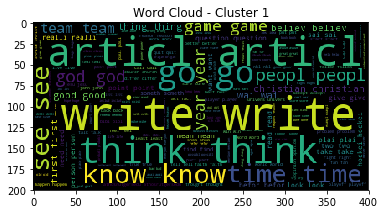

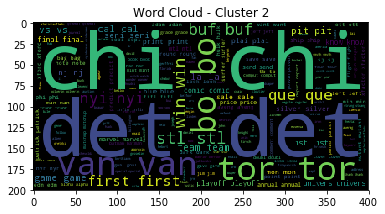

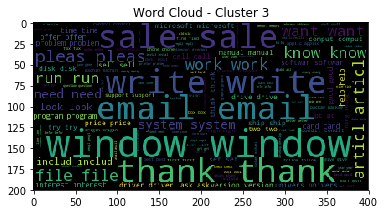

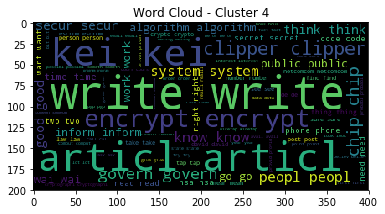

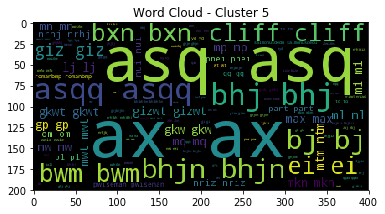

In [101]:
from wordcloud import WordCloud

c1_wc = WordCloud(background_color = 'black').generate(c1_words)
plt.imshow(c1_wc)
plt.title('Word Cloud - Cluster 1')
plt.show()

c2_wc = WordCloud(background_color = 'black').generate(c2_words)
plt.imshow(c2_wc)
plt.title('Word Cloud - Cluster 2')
plt.show()

c3_wc = WordCloud(background_color = 'black').generate(c3_words)
plt.imshow(c3_wc)
plt.title('Word Cloud - Cluster 3')
plt.show()

c4_wc = WordCloud(background_color = 'black').generate(c4_words)
plt.imshow(c4_wc)
plt.title('Word Cloud - Cluster 4')
plt.show()

c5_wc = WordCloud(background_color = 'black').generate(c5_words)
plt.imshow(c5_wc)
plt.title('Word Cloud - Cluster 5')
plt.show()